# WeatherPy

---

## Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Imports the OpenWeatherMap API key
from api_keys import weather_api_key

# Imports citipy to determine the cities based on latitude and longitude
from citipy import citipy

### This generates a list of cities the `citipy` library

In [2]:
# Creates empty list for holding the latitude and longitude combinations
lat_lngs = []

# Creates empty list for holding the cities names
cities = []

# Creates variables with range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Creates a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifies the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it is added to our cities list
    if city not in cities:
        cities.append(city)

# Prints the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Creates Plots to Showcase the Relationship Between Weather Variables and Latitude

### The OpenWeatherMap API is used to retrieve weather data from the cities list generated in the previous section

In [25]:
# Sets the API base URL

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Defines an empty list to fetch the weather data for each city
city_data = []

# Prints to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Creates an endpoint URL with each city
    city_url = requests.get(query_url + city).json()
    
    # Logs the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adds 1 to the record counter
    record_count += 1

    # Runs an API request for each of the cities
    try:
        # Parses the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        

        # Parses out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Appends the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skips the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicates that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao tome
Processing Record 2 of Set 1 | mount pearl
Processing Record 3 of Set 1 | pacific grove
Processing Record 4 of Set 1 | bernardo de irigoyen
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | fort st. john
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | darwin
Processing Record 13 of Set 1 | verkhniye sergi
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | ventspils
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | port moresby
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22

In [26]:
# Converts the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Shows Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [27]:
# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao tome,0.3365,6.7273,26.45,81,95,2.10,ST,1698523623
1,mount pearl,47.5166,-52.7813,13.41,95,99,1.34,CA,1698523900
2,pacific grove,36.6177,-121.9166,21.42,62,0,5.81,US,1698523901
3,bernardo de irigoyen,-26.2552,-53.6458,19.06,98,99,2.48,AR,1698523901
4,grytviken,-54.2811,-36.5092,-0.43,97,100,1.11,GS,1698523625


In [28]:
# Exports the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Reads saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao tome,0.3365,6.7273,26.45,81,95,2.10,ST,1698523623
1,mount pearl,47.5166,-52.7813,13.41,95,99,1.34,CA,1698523900
2,pacific grove,36.6177,-121.9166,21.42,62,0,5.81,US,1698523901
3,bernardo de irigoyen,-26.2552,-53.6458,19.06,98,99,2.48,AR,1698523901
4,grytviken,-54.2811,-36.5092,-0.43,97,100,1.11,GS,1698523625


### Scatter Plot Visualizations

#### Latitude Vs. Temperature

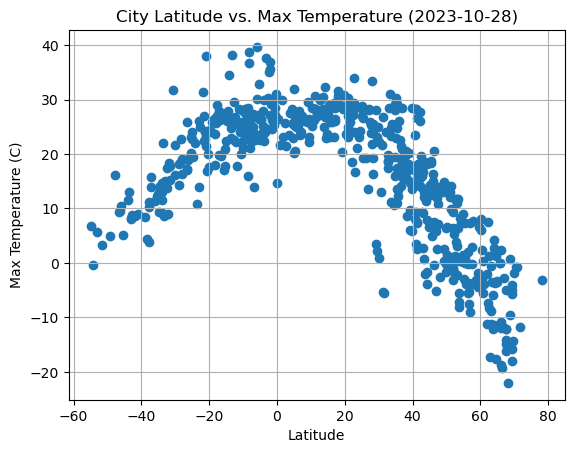

In [30]:
# Builds a scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Converts date from the first record to add to the title
date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves the figure
plt.savefig("output_data/Fig1.png")

# Shows plot
plt.show()

#### Latitude Vs. Humidity

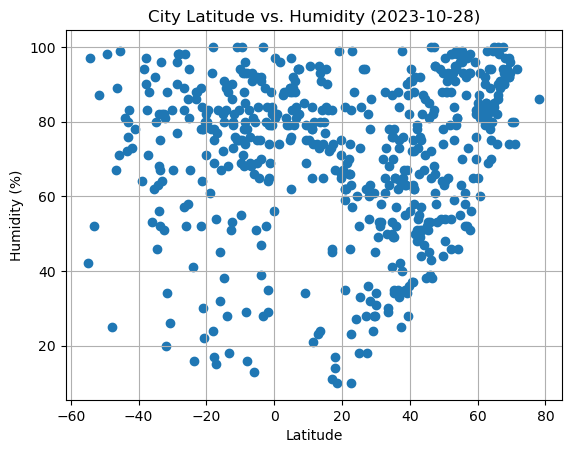

In [31]:
# Builds the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Converts date from the first record to add to the title
date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves the figure
plt.savefig("output_data/Fig2.png")

# Shows plot
plt.show()

#### Latitude Vs. Cloudiness

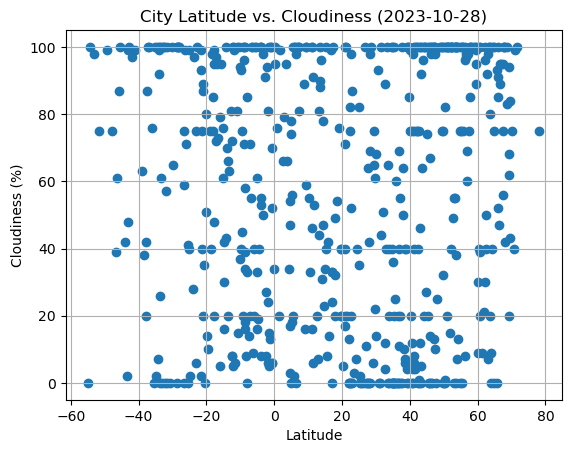

In [32]:
# Builds the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Converts date from the first record to add to the title
date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves the figure
plt.savefig("output_data/Fig3.png")

# Shows plot
plt.show()

#### Latitude vs. Wind Speed Plot

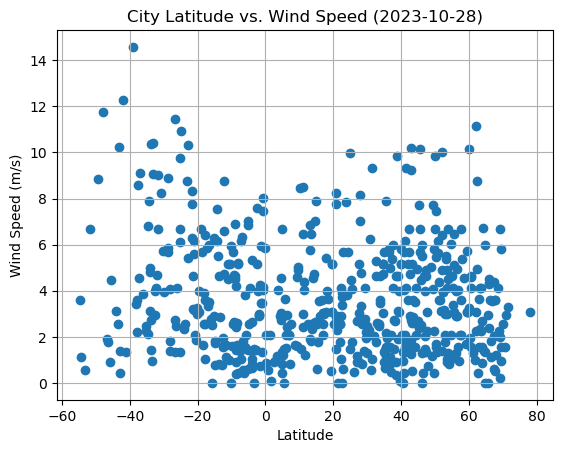

In [33]:
# Builds the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Converts date from the first record to add to the title
date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves the figure
plt.savefig("output_data/Fig4.png")

# Shows plot
plt.show()

---

## Linear Regression Tests


In [34]:
# Defines a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, x_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared value is: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()


In [35]:
# Creates a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Displays sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao tome,0.3365,6.7273,26.45,81,95,2.10,ST,1698523623
1,mount pearl,47.5166,-52.7813,13.41,95,99,1.34,CA,1698523900
2,pacific grove,36.6177,-121.9166,21.42,62,0,5.81,US,1698523901
5,fort st. john,56.2499,-120.8529,-0.20,52,96,1.28,CA,1698523625
8,nar'yan-mar,67.6713,53.0870,-12.16,90,100,3.58,RU,1698523450


In [36]:
# Creates a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Displays sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bernardo de irigoyen,-26.2552,-53.6458,19.06,98,99,2.48,AR,1698523901
4,grytviken,-54.2811,-36.5092,-0.43,97,100,1.11,GS,1698523625
6,blackmans bay,-43.0167,147.3167,8.18,80,99,0.45,AU,1698523902
7,waitangi,-43.9535,-176.5597,11.57,81,42,3.13,NZ,1698523626
11,darwin,-12.4611,130.8418,25.99,86,8,1.54,AU,1698523653


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7155033584995972


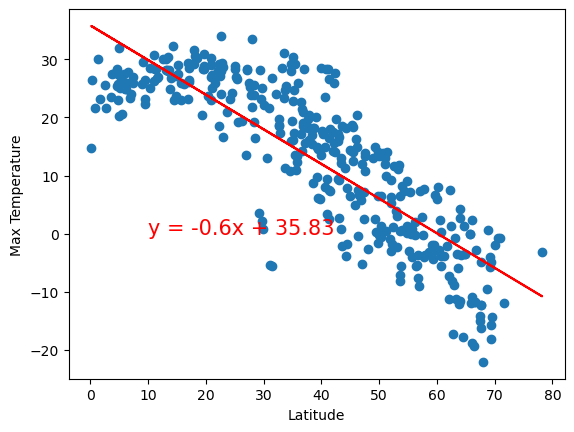

In [48]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temperature", "Latitude", (10,0))


The r-squared value is: 0.6474798766127736


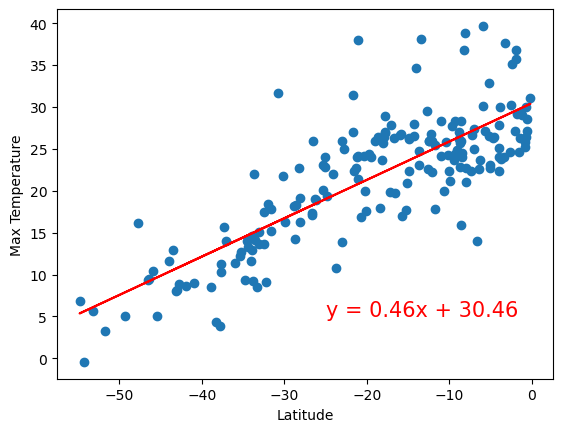

In [49]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temperature", "Latitude", (-25,5))

**Observations** 

Observing the plotted data comparing change in latitude to max temperature, we can see that the data follows the regression line, albeit moderately loose. When viewing the r-squared value for the data plotted for the northern hemisphere, we get a value of .7155, or 72%. For the data plotted for the souther hemisphere, we get a r-squared value of .6474, or 65%. This shows that regression model moderately supports the variation in data. 

As one may expect a direct correlation between latitude and maximum temperature, the variance is a little greater than one might expect. That said, the data set includes randomly chosen locations, all of which are likely to be at various altitudes, which also would have an impact on the maximum temperature for the location. This being the case, it’s likely that we’d see values more fitted across the regression line if all locations within the data set were at the same altitude.  

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.046549248245860556


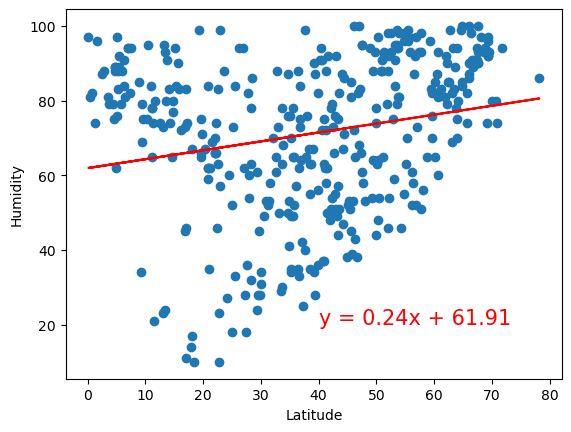

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", "Latitude", (40,20))

The r-squared value is: 0.0012942433977578057


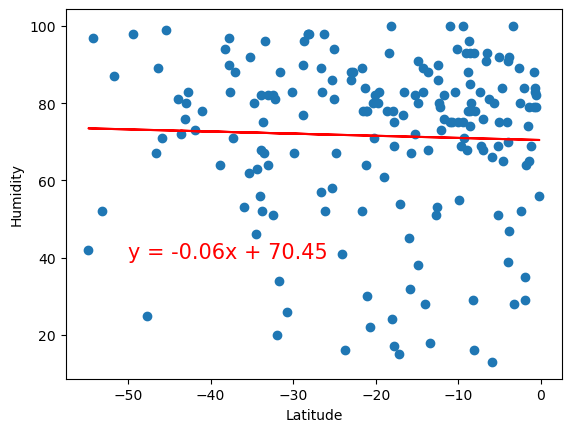

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", "Latitude", (-50,40))

**Observations** 

Observing the plotted data comparing change in latitude to humidity, we can see that the data does not appear to be well fitted to the regression line. Furthermore the low r-squared values of .0456 or 5% for the northern hemisphere data set and .0012 or 0% for the southern hemisphere shows that the regression model does not adequately explain variance. 

Interestingly though, the plotted data for the northern and southern hemispheres do not mirror each other. 

When looking at the data plotted for the northern hemisphere, we can see a large number of higher humidity locations across all latitudes. Yet, there is a pocket of low humidity locations between 10 and 40 degrees. This may indicate that there are more geographic areas within this latitude range that are far from bodies of water that could contribute to higher levels of humidity. 

Compared to the northern hemisphere, the southern hemisphere also has a higher concentration of locations with higher humidity across all latitudes. However, the locations with low humidity are spread out across all latitudes. Indicating the presence of more arid locations across all latitudes. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.031072902571635988


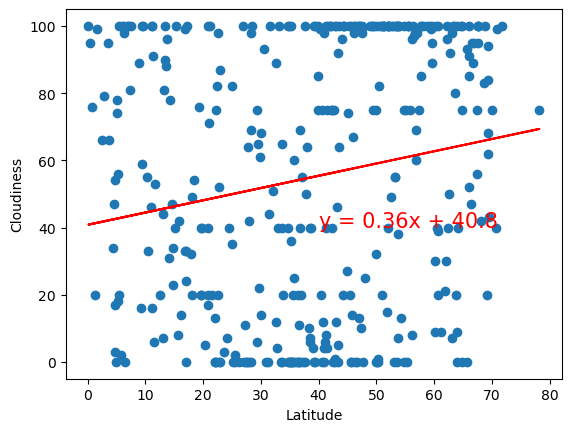

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness", "Latitude",(40,40))

The r-squared value is: 0.016238974768975647


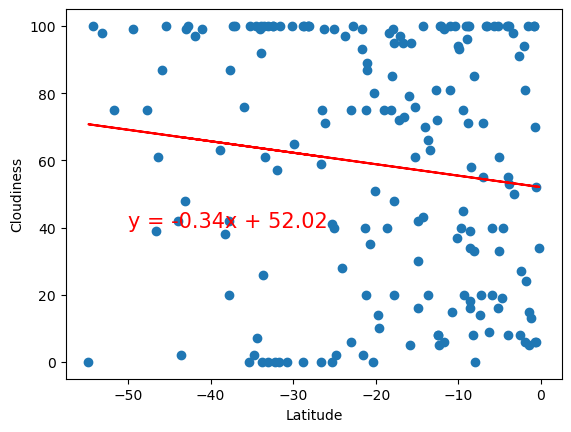

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", "Latitude", (-50,40))

**Observations** 

Observing the plotted data comparing latitude to cloudiness, the data doesn't closely fit the regression line for either northern or southern hemispheres. The r-squared value for the northern hemisphere sits at .031 or 3% and for the southern hemisphere at .0162 or 2% shows that the linear regression model provides almost no explanation for the spread of the data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0034705790786866376


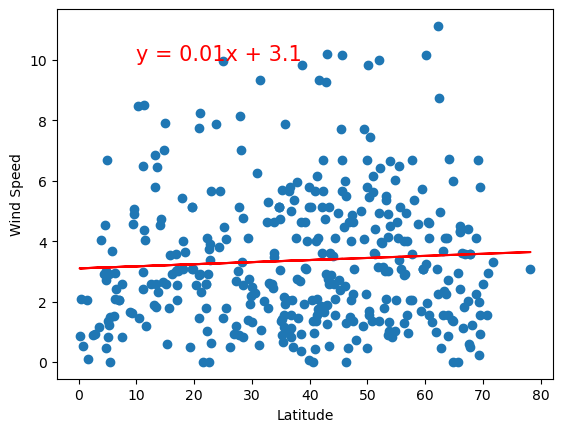

In [54]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", "Latitude",(10,10))

The r-squared value is: 0.053500615826529464


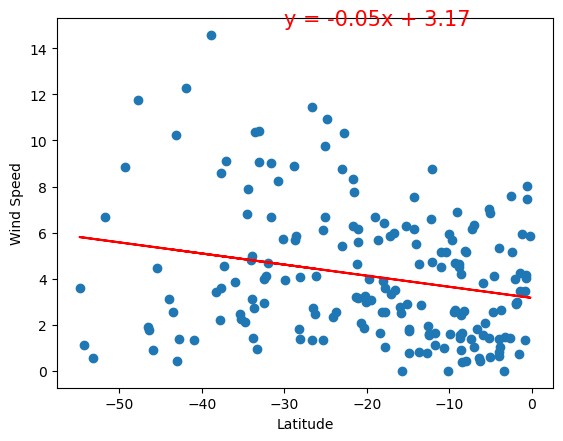

In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", "Latitude", (-30,15))

**Observations** 

Observing the plotted data comparing latitude to wind speed, the data doesn't closely fit the regression line for either northern or southern hemispheres. The r-squared value for the northern hemisphere sits at .0034 or 0% and for the southern hemisphere at .0535 or 5% shows that the linear regression model provides almost no explanation for the spread of the data. 